In [117]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [118]:
# winner state: 10101

In [119]:
main = QuantumCircuit(5)
oracle = QuantumCircuit(5, name='oracle')
reflection = QuantumCircuit(5, name='reflection')

In [120]:
# oracle operator: to flip the sign of the winning state
oracle.h([0,1,2,3,4])
oracle.z([0,2,4])
oracle.to_gate()

oracle.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ Z ├
     ├───┤└───┘
q_1: ┤ H ├─────
     ├───┤┌───┐
q_2: ┤ H ├┤ Z ├
     ├───┤└───┘
q_3: ┤ H ├─────
     ├───┤┌───┐
q_4: ┤ H ├┤ Z ├
     └───┘└───┘

In [121]:
# reflection operator
reflection.h([0,1,2,3,4])
reflection.z(0)
reflection.cz(1,0)
reflection.z(2)
reflection.cz(3,2)
reflection.z(4)
reflection.to_gate()

reflection.draw()

┌───┐┌───┐   
q_0: ┤ H ├┤ Z ├─■─
     ├───┤└───┘ │ 
q_1: ┤ H ├──────■─
     ├───┤┌───┐   
q_2: ┤ H ├┤ Z ├─■─
     ├───┤└───┘ │ 
q_3: ┤ H ├──────■─
     ├───┤┌───┐   
q_4: ┤ H ├┤ Z ├───
     └───┘└───┘

In [122]:
main.append(oracle,[0,1,2,3,4])
main.append(reflection, [0,1,2,3,4])

# measurement
main.measure_all()
main.draw()

┌─────────┐┌─────────────┐ ░ ┌─┐            
   q_0: ┤0        ├┤0            ├─░─┤M├────────────
        │         ││             │ ░ └╥┘┌─┐         
   q_1: ┤1        ├┤1            ├─░──╫─┤M├─────────
        │         ││             │ ░  ║ └╥┘┌─┐      
   q_2: ┤2 oracle ├┤2 reflection ├─░──╫──╫─┤M├──────
        │         ││             │ ░  ║  ║ └╥┘┌─┐   
   q_3: ┤3        ├┤3            ├─░──╫──╫──╫─┤M├───
        │         ││             │ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤4        ├┤4            ├─░──╫──╫──╫──╫─┤M├
        └─────────┘└─────────────┘ ░  ║  ║  ║  ║ └╥┘
meas_0: ══════════════════════════════╩══╬══╬══╬══╬═
                                         ║  ║  ║  ║ 
meas_1: ═════════════════════════════════╩══╬══╬══╬═
                                            ║  ║  ║ 
meas_2: ════════════════════════════════════╩══╬══╬═
                                               ║  ║ 
meas_3: ═══════════════════════════════════════╩══╬═
                                                  ║ 
meas_4: ══════════════════════════════════════════╩═

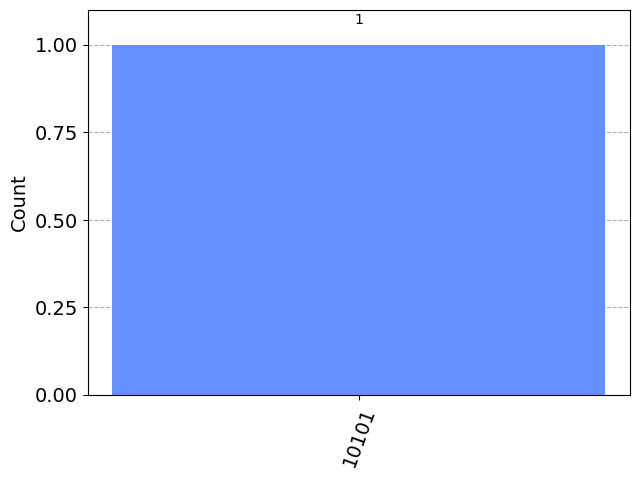

In [123]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(main, backend=simulator).result()
plot_histogram(result.get_counts(main))

In [124]:
counts = result.get_counts(main)
print(counts)

{'10101': 1}
